In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

from tqdm.notebook import tqdm

# load labels

In [2]:
labels = pd.read_csv('osfstorage-archive/rois-with-grade.csv')
labels

,roi_label,grade
0,1_1,3
1,1_2,3
2,1_3,3
3,1_4,3
4,1_5,3
...,...,...
5177,15_270,3
5178,15_271,3
5179,15_272,3
5180,15_273,3


# load images

In [3]:
NUMBER_OF_SAMPLES = 4

np_grayscale_images = []

for label in tqdm(labels.roi_label):
    temp = Image.open("osfstorage-archive/rois/{}.tiff".format(label))
    
    grayscale_img = ImageOps.grayscale(temp)
    np_grayscale_images.append(np.int16(grayscale_img))
    
    temp.close()
        
fig, axs = plt.subplots(2, NUMBER_OF_SAMPLES,
                       figsize=(16, 8))

for i in range(NUMBER_OF_SAMPLES):
    axs[0, i].imshow(np_grayscale_images[i])
    axs[1, i].imshow(np_grayscale_images[i+NUMBER_OF_SAMPLES])

  0%|          | 0/5182 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
print(len(np_grayscale_images))
print(np_grayscale_images[0].shape)

5182
(512, 512)


In [8]:
np_grayscale_images[0]

array([[116, 128, 101, ..., 141, 128, 140],
       [114, 114,  96, ..., 167, 153, 165],
       [123, 109, 100, ..., 186, 173, 189],
       ...,
       [ 73, 101, 130, ..., 233, 234, 233],
       [ 70, 123, 175, ..., 233, 232, 221],
       [118, 166, 201, ..., 214, 208, 186]], dtype=int16)

# Compute Euler Characteristic

In [4]:
import pyEulerCurves as pyecc

In [5]:
list_of_ECCs = []

for img in tqdm(np_grayscale_images[:1]):
    
    trans = pyecc.ECC_from_bitmap(periodic_boundary=False, 
                                  workers=1    # number of CPU cores
                              )
    
    list_of_ECCs.append(trans.fit_transform(img))
    

  0%|          | 0/1 [00:00<?, ?it/s]

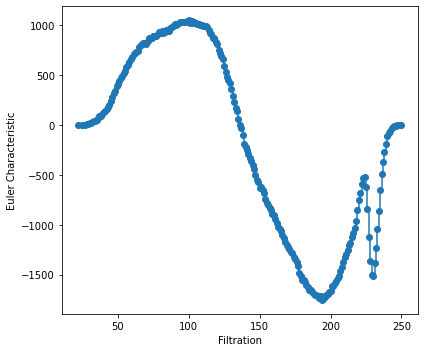

In [12]:
plt.figure(figsize=(6,5))
pyecc.plot_euler_curve(list_of_ECCs[0], with_lines=True)
plt.tight_layout()
plt.savefig('raw_ecc.pdf')

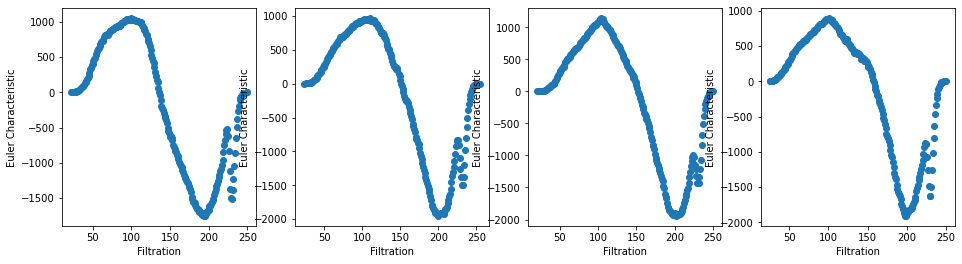

In [11]:
fig, axs = plt.subplots(1, NUMBER_OF_SAMPLES,
                       figsize=(16, 4))

for i in range(NUMBER_OF_SAMPLES):
    pyecc.plot_euler_curve(list_of_ECCs[i], axs[i], with_lines=False)

In [13]:
list_of_ECCs[0]

[[22.0, 1.0],
 [25.0, 2.0],
 [27.0, 5.0],
 [28.0, 9.0],
 [29.0, 12.0],
 [30.0, 17.0],
 [31.0, 20.0],
 [32.0, 29.0],
 [33.0, 36.0],
 [34.0, 45.0],
 [35.0, 54.0],
 [36.0, 69.0],
 [37.0, 86.0],
 [38.0, 95.0],
 [39.0, 109.0],
 [40.0, 126.0],
 [41.0, 146.0],
 [42.0, 158.0],
 [43.0, 183.0],
 [44.0, 199.0],
 [45.0, 237.0],
 [46.0, 280.0],
 [47.0, 324.0],
 [48.0, 344.0],
 [49.0, 389.0],
 [50.0, 408.0],
 [51.0, 437.0],
 [52.0, 471.0],
 [53.0, 492.0],
 [54.0, 525.0],
 [55.0, 545.0],
 [56.0, 579.0],
 [57.0, 607.0],
 [58.0, 631.0],
 [59.0, 661.0],
 [60.0, 687.0],
 [61.0, 713.0],
 [62.0, 721.0],
 [63.0, 731.0],
 [64.0, 747.0],
 [65.0, 782.0],
 [66.0, 807.0],
 [67.0, 815.0],
 [68.0, 819.0],
 [69.0, 822.0],
 [70.0, 818.0],
 [71.0, 839.0],
 [72.0, 869.0],
 [73.0, 874.0],
 [74.0, 877.0],
 [75.0, 890.0],
 [76.0, 893.0],
 [77.0, 894.0],
 [78.0, 913.0],
 [79.0, 930.0],
 [80.0, 923.0],
 [81.0, 940.0],
 [82.0, 927.0],
 [83.0, 936.0],
 [84.0, 952.0],
 [85.0, 944.0],
 [86.0, 948.0],
 [87.0, 978.0],
 [88.0, 98

### create vectors of lenght 256 with all the EC values

In [18]:
def EC_at_filtration(ecc_list, f, initial_value = 0):

    ec = initial_value

    for current_ec in ecc_list:
        if current_ec[0] > f:
            break
        ec = current_ec[1]

    return ec


In [23]:
def fill_up_ecc(ecc):
    
    if ecc[0][0] == 0:
        initial_value = ecc[0][1]
    else:
        initial_value = 0
        
    return np.array([EC_at_filtration(ecc, f, initial_value) for f in range(256)],
                    dtype=int)

In [24]:
list_of_complete_ECCs = [fill_up_ecc(ecc) for ecc in tqdm(list_of_ECCs)]

In [25]:
list_of_complete_ECCs[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     1,     1,     1,     2,     2,
           5,     9,    12,    17,    20,    29,    36,    45,    54,
          69,    86,    95,   109,   126,   146,   158,   183,   199,
         237,   280,   324,   344,   389,   408,   437,   471,   492,
         525,   545,   579,   607,   631,   661,   687,   713,   721,
         731,   747,   782,   807,   815,   819,   822,   818,   839,
         869,   874,   877,   890,   893,   894,   913,   930,   923,
         940,   927,   936,   952,   944,   948,   978,   983,   998,
        1013,   999,  1014,  1024,  1033,  1038,  1029,  1034,  1031,
        1040,  1050,  1026,  1044,  1022,  1029,  1022,  1018,  1010,
        1008,  1006,   993,   993,   995,   980,   951,   921,   909,
         877,   874,   833,   813,   756,   721,   697,   660,   593,
         530,   481,

In [36]:
dataset = pd.DataFrame(np.row_stack(list_of_complete_ECCs))
dataset

In [38]:
labels

,roi_label,grade
0,1_1,3
1,1_2,3
2,1_3,3
3,1_4,3
4,1_5,3
...,...,...
5177,15_270,3
5178,15_271,3
5179,15_272,3
5180,15_273,3


In [40]:
dataset['roi_label'] = labels.roi_label
dataset['grade'] = labels.grade

In [44]:
dataset.grade.value_counts()

3    2567
4    2351
5     264
Name: grade, dtype: int64

In [45]:
dataset.to_csv('hist_ECCs.csv')

### compute distance matrix

In [32]:
distance_matrix = np.zeros((len(list_of_complete_ECCs), len(list_of_complete_ECCs)))

for i in tqdm(range(len(list_of_ECCs))):
    for j in range(i+1, len(list_of_ECCs)):
        distance_matrix[i,j] = np.sum(abs(list_of_complete_ECCs[i] - list_of_complete_ECCs[j]))
        distance_matrix[j,i] = distance_matrix[i,j]

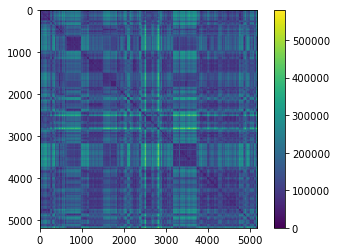

In [33]:
plt.imshow(distance_matrix)
plt.colorbar()